In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = sns.load_dataset('iris')
display(data.head())
print(data.shape)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)


In [3]:
data.columns   # Xem các thuộc tính của mẫu dữ liệu

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.isnull().any(axis=1).head()   # Kiểm tra các dữ liệu có Null hay không

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [5]:
data[data.isnull().any(axis=1)].head()   # Kiểm tra các phần tử theo dòng có thuộc tính chứa giá trị Null / NaN)

,sepal_length,sepal_width,petal_length,petal_width,species


In [21]:
clean_data = data.copy()
clean_data['sepal_length_label'] = (clean_data['sepal_length'] > 5) *1 # Tạo thuộc tính 'sepal_length_label' và gán giá trị label (True * 1 = 1; False * 1 = 0)
clean_data['sepal_length_label'].head()

0    1
1    0
2    0
3    0
4    0
Name: sepal_length_label, dtype: int64

In [22]:
y = clean_data[['sepal_length_label']].copy()   # Gán label vào biến y
y.head()

,sepal_length_label
0,1
1,0
2,0
3,0
4,0


In [23]:
clean_data['sepal_length'].head()  

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [24]:
features = ['sepal_width', 'petal_length', 'petal_width']

In [25]:
x=clean_data[features].copy()  
x.columns     # Xem các thuộc tính của x

Index(['sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [26]:
y.columns     # Xem các thuộc tính của label y

Index(['sepal_length_label'], dtype='object')

In [27]:
# Phân tập dữ liệu và label thành tập train và tập test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [28]:
iris_classifier = DecisionTreeClassifier(max_leaf_nodes=10)        # Khởi tạo mô hình Decision Tree
iris_classifier.fit(X_train,y_train)                          # Dùng x và y để huấn luyện mô hình

DecisionTreeClassifier(max_leaf_nodes=10)

In [29]:
y_predicted = iris_classifier.predict(X_test)

In [30]:
y_predicted[:10]    

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [31]:
y_test['sepal_length_label'][:10]    # Label thực tế của tập test

81     1
97     1
95     1
42     0
41     0
32     1
145    1
102    1
24     0
35     0
Name: sepal_length_label, dtype: int64

In [32]:
accuracy_score(y_test,y_predicted)*100  # Tính độ chính xác của mô hình trên tập test

84.0

In [33]:
from sklearn import tree
tree.export_graphviz(iris_classifier, out_file='tree.dot')      # Lưu model vào 'tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])   # Chuyển model sang dạng png

0

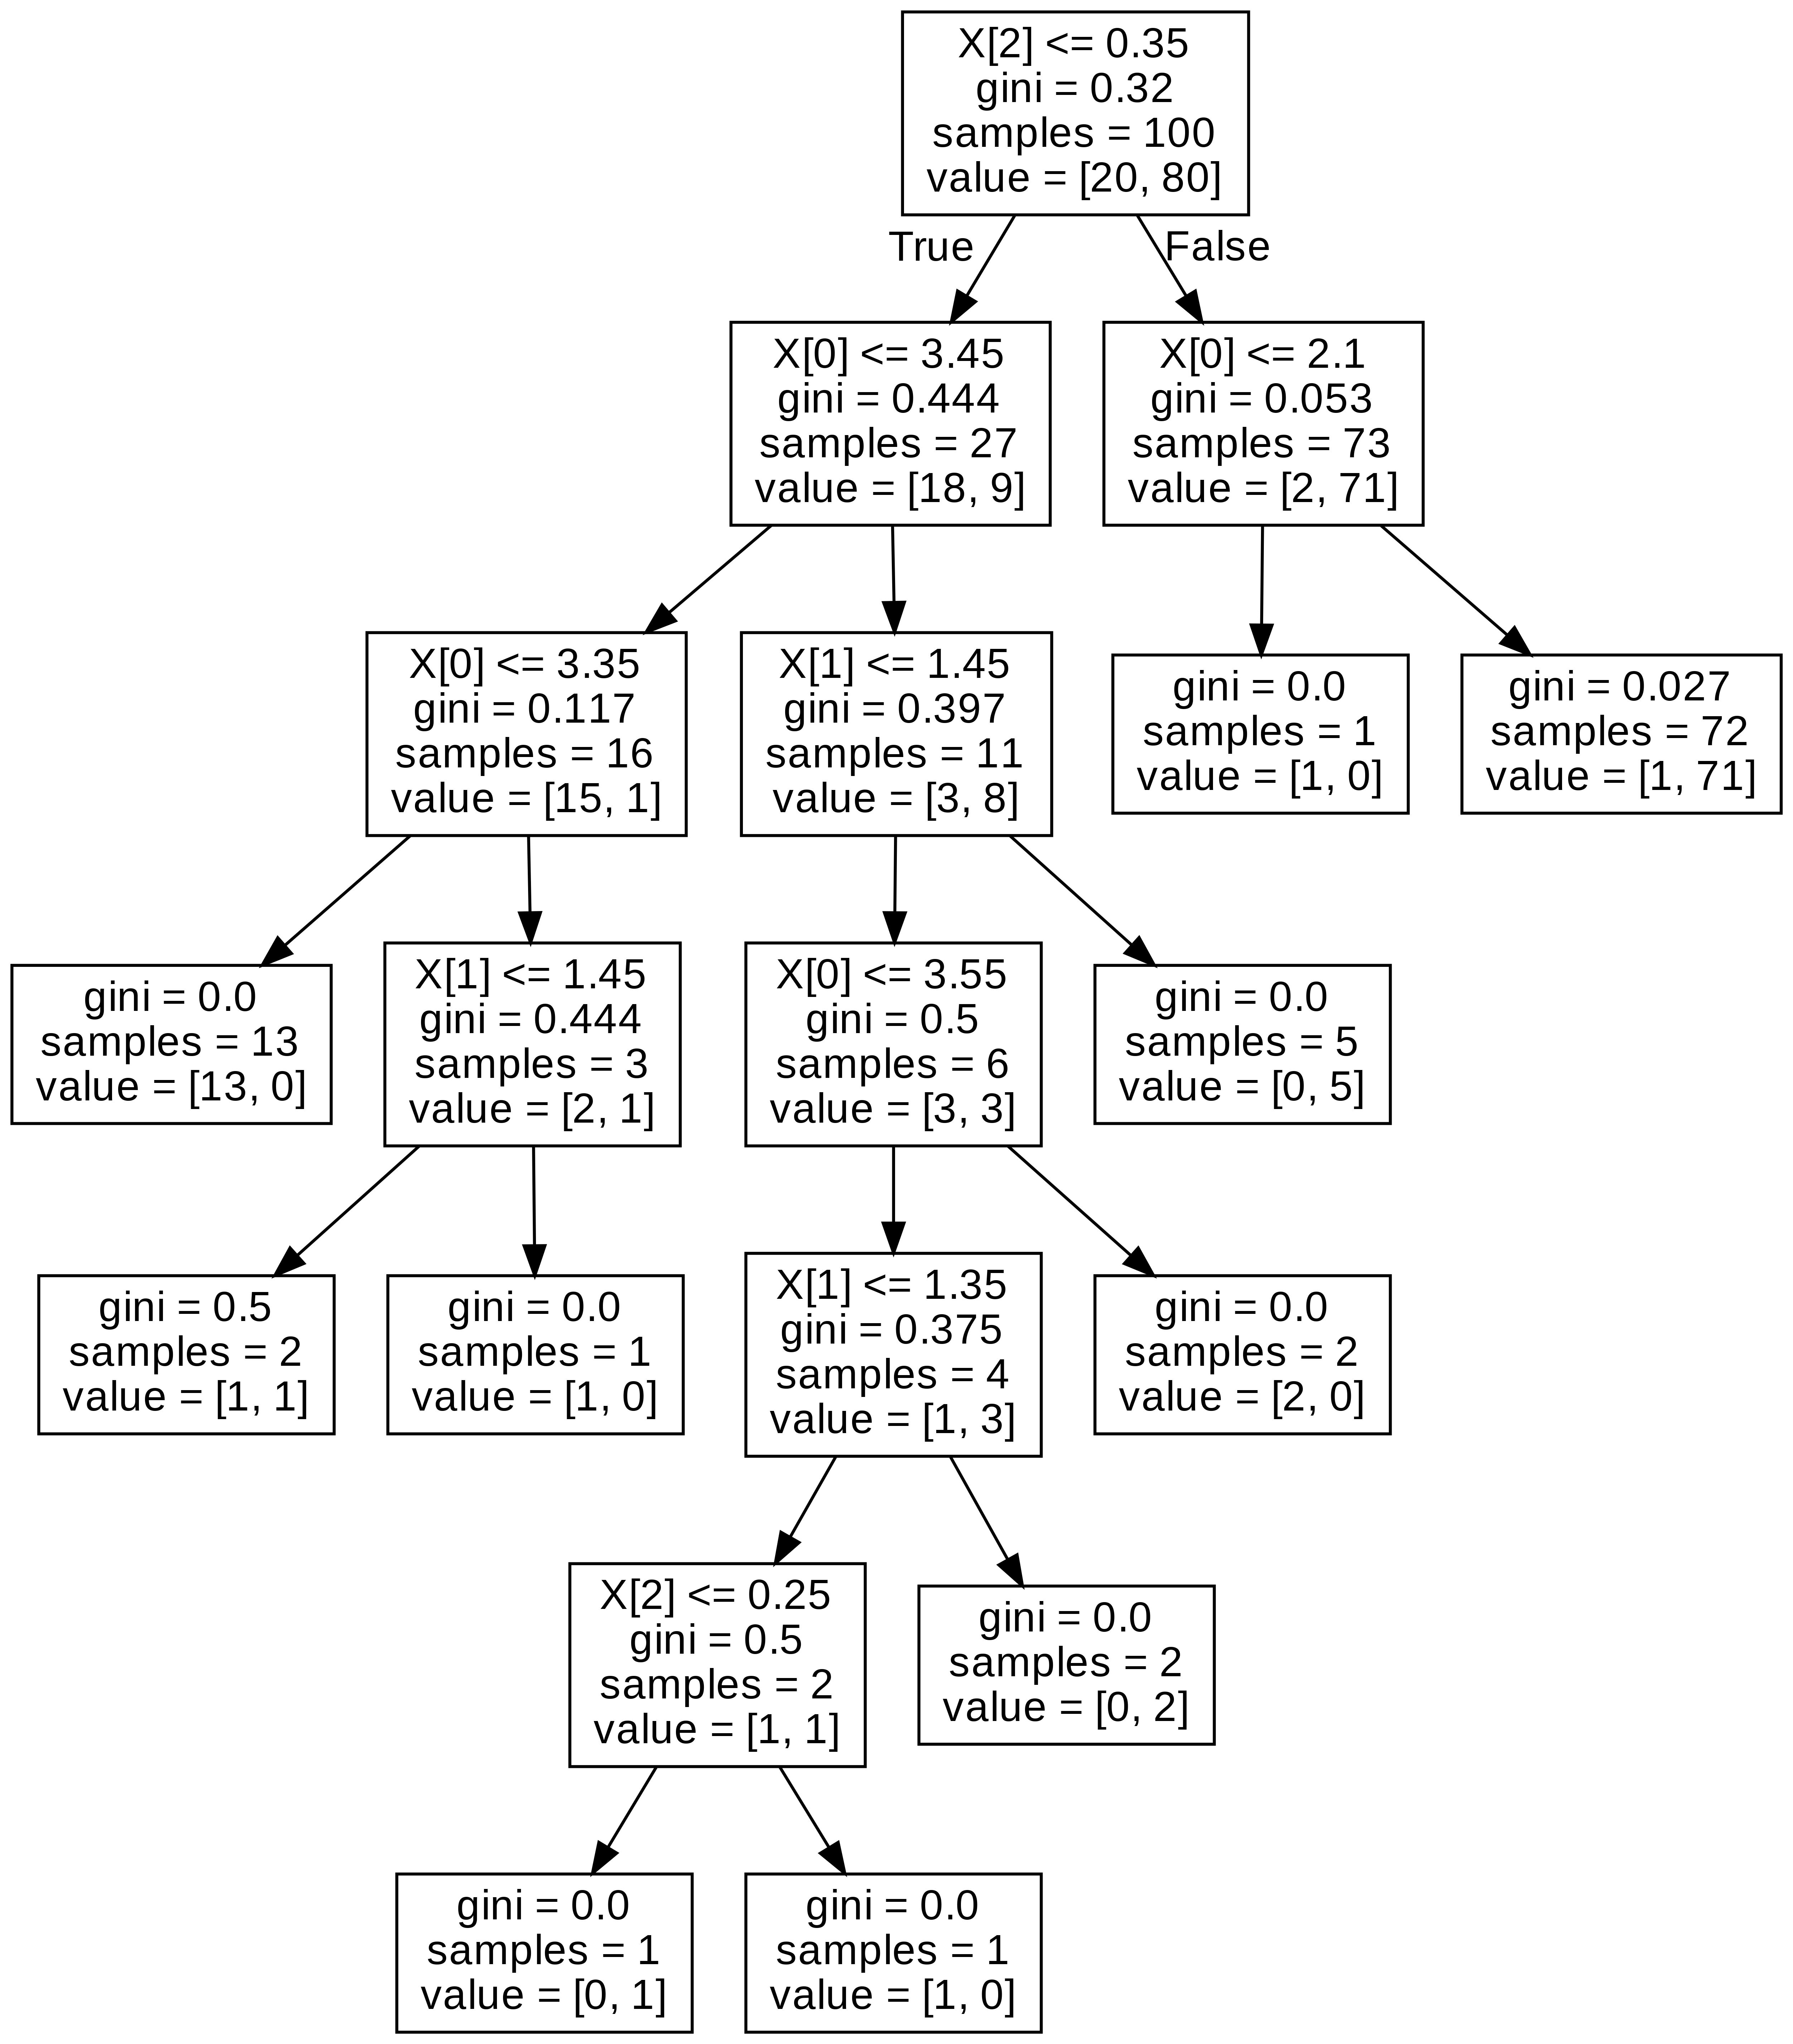

In [34]:
from IPython.display import Image
Image(filename = 'tree.png')     # Load file 'tree.png'